## Import required libraries

In [16]:
import pandas as pd
import numpy as np
import json
# plotting
import os
import pathlib
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import glob
import math
from mplsoccer import VerticalPitch


pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

## Import all events per Man City's matches

In [2]:
# Define the wildcard pattern to match the file names
pattern = '../data/StatsBomb/Data/*_events.json'
# Use glob to find all files that match the pattern
file_list = glob.glob(pattern)

In [3]:
match_game = '_'.join(file_list[0].split('/')[-1].split('_')[:2])

In [4]:
df_list = []
for file in file_list:
    # Open the file and load its contents into a dictionary
    with open(file, 'r') as f:
        data = json.load(f)
        match_game = '_'.join(file.split('/')[-1].split('_')[:2])
        df_game = pd.json_normalize(data)
        df_game['match_game'] = match_game
        # Convert the list of JSON values to a DataFrame
        df_list.append(df_game)

In [5]:
df = pd.concat(df_list,ignore_index = True)

In [6]:
df[['match_game']].value_counts()

match_game           
ManCity_Brighton         3976
ManCity_Tottenham        3777
ManCity_Arsenal          3629
ManCity_LeicesterCity    3475
ManCity_AstonVilla       3392
ManCity_Liverpool        3083
dtype: int64

## Collect all the shot attempts

In [7]:
shot_df = df[df['type.name']=='Shot']

In [14]:
#get shot df
shot_df["x"] = shot_df['location'].apply(lambda cell: (cell[0]))
shot_df["y"] = shot_df['location'].apply(lambda cell: cell[1])

## Plot goal location

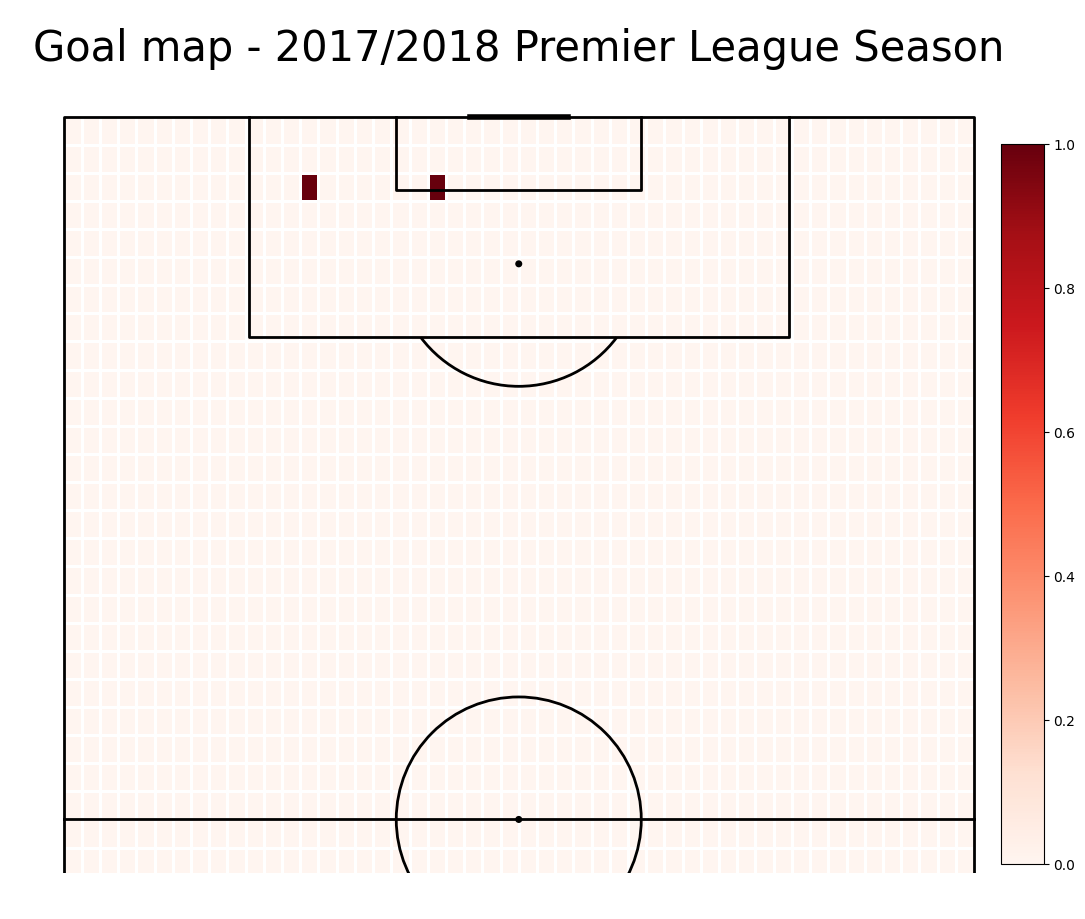

In [29]:
#take only goals
goals = shot_df[shot_df['shot.outcome.name']=='Goal']
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#calculate number of goals in each bin
bin_statistic_goals = pitch.bin_statistic(goals.x, goals.y, bins=50)
#plot heatmap
pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Reds', edgecolor='white')
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal map - 2017/2018 Premier League Season' , fontsize = 30)
plt.show()

## Plotting the probability of scoring a goal given the location

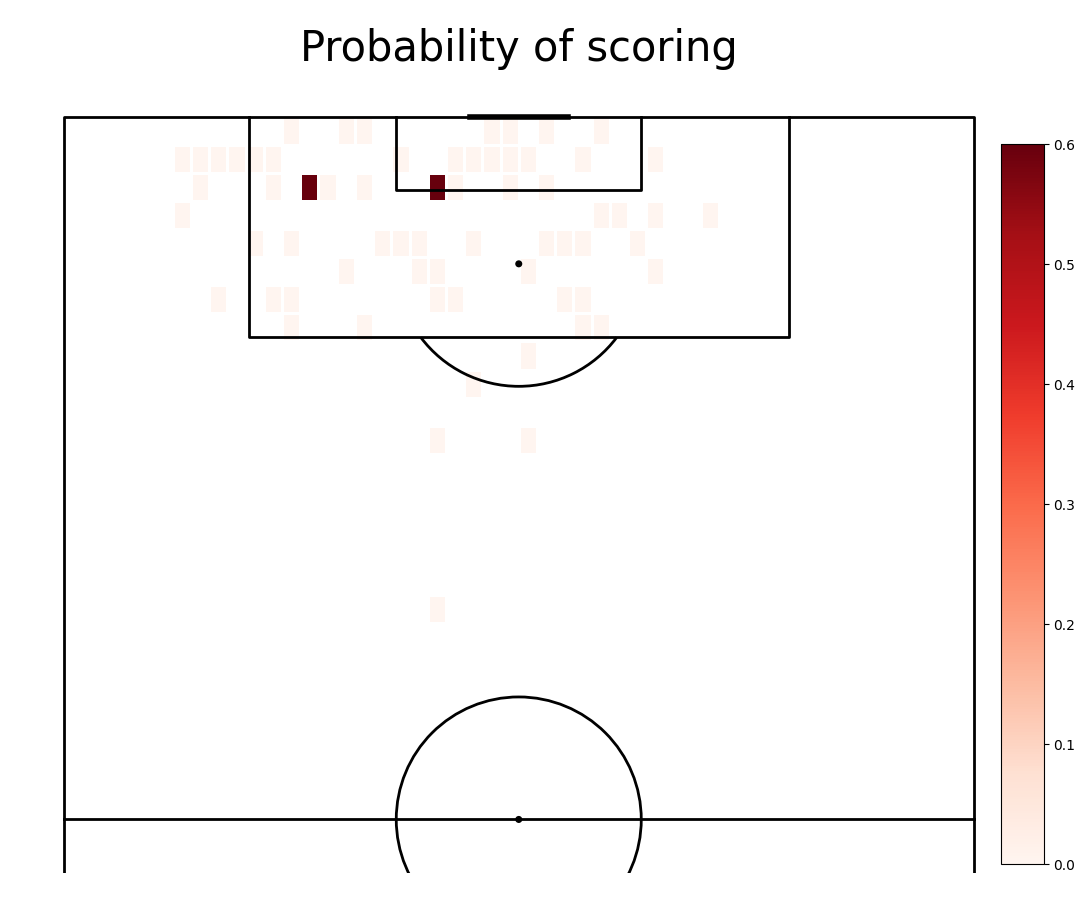

In [31]:
#plot pitch
pitch = VerticalPitch(line_color='black', half = True, pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(shot_df.x, shot_df.y, bins = 50)
#normalize number of goals by number of shots
bin_statistic["statistic"] = bin_statistic_goals["statistic"]/bin_statistic["statistic"]
#plot heatmap
pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)
#make legend
ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

In [32]:
shot_df[['shot.statsbomb_xg']].head()

,shot.statsbomb_xg
22,0.157454
141,0.089495
219,0.009850
244,0.115049
273,0.015118
